# Tutorial on the Simulation of the DNA Environment

Discover how to model DNA excited-state relaxation and environmental interactions using dephasing and thermalization models from Quantum Biology.
This notebook explores various methods for incorporating DNA environment effects and exciton relaxation in the `qDNA` package. Key topics include:

* **Local & Global Dephasing**: Analyzing the impact of environmental noise on quantum states.
* **Local & Global Thermalizing**: Modeling the system's approach to thermal equilibrium.
* **Trace Distance to Equilibrium**: Measuring how close the system is to its equilibrium state.
  
Through these examples, the notebook demonstrates techniques for simulating and analyzing DNA-related quantum phenomena in the presence of an environment.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/3_Environment_Simulation.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Save flag: Set to True to enable saving results (currently unused in this script)
save = False

# Verbose flag: Set to True to enable detailed logging
verbose = False

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Installation of QuantumDNA
# --------------------------

from importlib.util import find_spec

qDNA_installed = find_spec('qDNA') is not None

if not qDNA_installed:
    %pip install qDNA
    print("Successfully installed the 'qDNA' package.")
else:
    print("Package 'qDNA' is already installed.")

if verbose:
    %pip show qDNA  

from qDNA import *

# ------------------------
# Directory Setup
# ------------------------

import os

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directory to save figures
SAVE_DIR = os.path.join(DATA_DIR, "my_figures")
os.makedirs(SAVE_DIR, exist_ok=True)

if verbose:
    print(f"Save directory: '{SAVE_DIR}' is ready.")

Package 'qDNA' is already installed.


## Function Definitions

In [3]:
def pre(vis):
    if vis.loc_deph_rate:
        lindblad_type = "local dephasing"
    elif vis.glob_deph_rate:
        lindblad_type = "global dephasing"
    elif vis.loc_therm:
        lindblad_type = "local thermalizing"
    elif vis.glob_therm:
        lindblad_type = "global thermalizing"
        
    if lindblad_type in ["local dephasing", "global dephasing"]:
        eq_state = get_deph_eq_state(vis)
    if lindblad_type in ["local thermalizing", "global thermalizing"]:
        eq_state = get_therm_eq_state(vis)
        
    print(f"Number of local dephasing operators: {vis.num_c_ops}")
    print("--------------------------------")
    
    return eq_state

def my_plot_pop(vis, tb_site):
    eq_state = pre(vis)

    fig, ax = vis.plot_pop(tb_site, add_legend=False)
    for particle in vis.particles:
        pop_particle_op = get_pop_observable(vis.tb_basis, vis.description, particle, tb_site)
        pop_particle = np.trace(eq_state @ pop_particle_op)
        ax.axhline(y=pop_particle, color='k', linestyle='--', alpha=0.5)
        print(f"Equilibium Population {particle.capitalize()}: {round(pop_particle, 3)}")

    return fig, ax

def my_plot_coh(vis):
    eq_state = pre(vis)
    
    fig, ax = vis.plot_coh()
    for particle in vis.particles:
        reduced_dm = get_reduced_dm(eq_state, particle, vis.tb_basis)
        coh_particle = np.sum(np.abs(reduced_dm)).real - np.sum(np.diag(reduced_dm)).real
        ax.axhline(y=coh_particle, color='k', linestyle='--', alpha=0.5)
        print(f"Equilibium Coherence {particle.capitalize()}: {round(coh_particle, 3)}")

    return fig, ax

## Local Dephasing

Number of local dephasing operators: 6
--------------------------------
Equilibium Population Electron: 0.5
Equilibium Population Hole: 0.5
Equilibium Population Exciton: 0.25


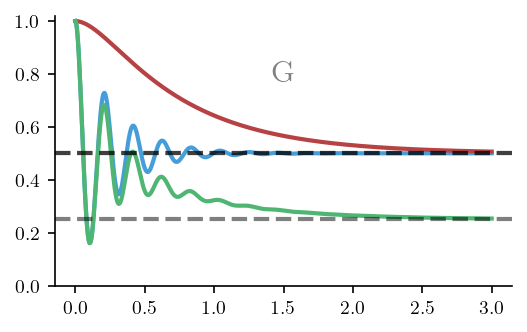

In [4]:
tb_sites = get_tb_sites('GC', tb_model_name='WM')
tb_site = '(0, 0)'
vis = Visualization(tb_sites, description='2P', loc_deph_rate=5, tb_model_name='WM')

fig, ax = my_plot_pop(vis, tb_site)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

Number of local dephasing operators: 12
--------------------------------
Equilibium Coherence Electron: 0.0
Equilibium Coherence Hole: 0.0
Equilibium Coherence Exciton: 0.0


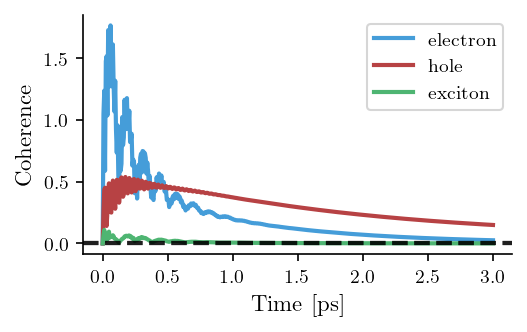

In [5]:
tb_sites = get_tb_sites('GC')
vis = Visualization(tb_sites, description='2P', loc_deph_rate=5, tb_model_name='ELM')

fig, ax = my_plot_coh(vis)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

Equilibium Population Electron at site (0, 0): 0.25
Equilibium Population Electron at site (0, 1): 0.25
Equilibium Population Electron at site (1, 0): 0.25
Equilibium Population Electron at site (1, 1): 0.25


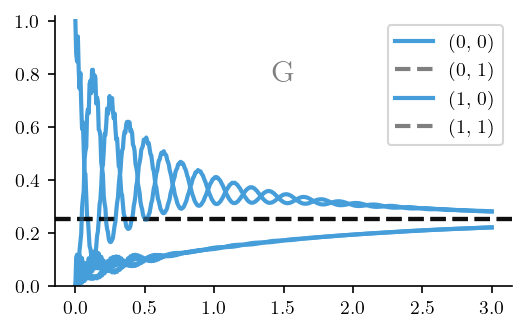

In [6]:
tb_sites = get_tb_sites('GC')
tb_site = '(0, 0)'
vis = Visualization(tb_sites, description='2P', particles=['electron'], loc_deph_rate=4, tb_model_name='ELM')

eq_state = get_deph_eq_state(vis)

pop_particle_dict = {}
for tb_site in vis.tb_basis:
    pop_particle_op = get_pop_observable(vis.tb_basis, vis.description, vis.particles[0], tb_site)
    pop_particle = np.trace(eq_state @ pop_particle_op)
    pop_particle_dict[tb_site] = pop_particle
    print(f"Equilibium Population {vis.particles[0].capitalize()} at site {tb_site}: {round(pop_particle, 3)}")

fig, ax = plt.subplots()
for tb_site in vis.tb_basis:
    fig, ax = vis.plot_pop(tb_site, ax=ax, fig=fig, add_legend=False)
    ax.axhline(y=pop_particle_dict[tb_site], color='k', linestyle='--', alpha=0.5)

ax.legend(vis.tb_basis)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Global Dephasing

Number of local dephasing operators: 4
--------------------------------
Equilibium Population Electron: 0.5
Equilibium Population Hole: 0.5
Equilibium Population Exciton: 0.25


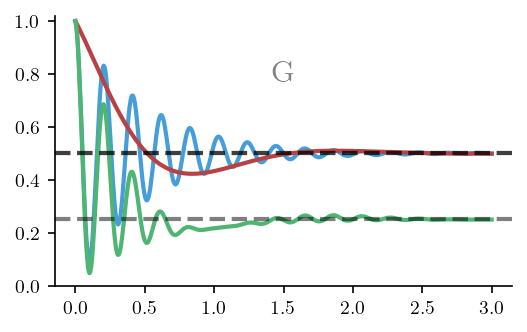

In [7]:
tb_sites = get_tb_sites('GC', tb_model_name='WM')
tb_site = '(0, 0)'
vis = Visualization(tb_sites, description='2P', glob_deph_rate=2, tb_model_name='WM')

fig, ax = my_plot_pop(vis, tb_site)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

Number of local dephasing operators: 16
--------------------------------
Equilibium Coherence Electron: 0.527
Equilibium Coherence Hole: 0.23
Equilibium Coherence Exciton: 0.017


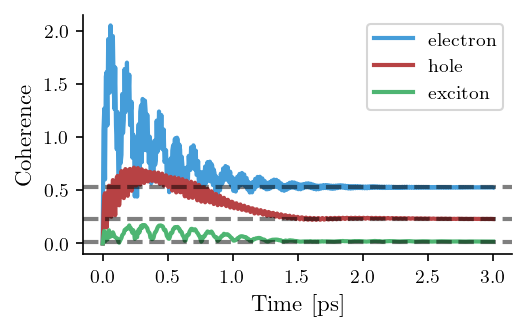

In [8]:
tb_sites = get_tb_sites('GC')
vis = Visualization(tb_sites, description='2P', glob_deph_rate=2, tb_model_name='ELM')

fig, ax = my_plot_coh(vis)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Local Thermalizing

Number of local dephasing operators: 52
--------------------------------
Equilibium Population Electron: 0.5
Equilibium Population Hole: 0.5
Equilibium Population Exciton: 0.25


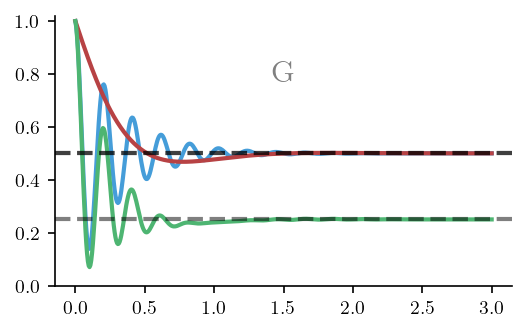

In [9]:
tb_sites = get_tb_sites('GC', tb_model_name='WM')
tb_site = '(0, 0)'
vis = Visualization(tb_sites, description='2P', loc_therm=True, tb_model_name='WM')

fig, ax = my_plot_pop(vis, tb_site)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

Number of local dephasing operators: 3728
--------------------------------
Equilibium Coherence Electron: 0.963
Equilibium Coherence Hole: 0.384
Equilibium Coherence Exciton: 0.027


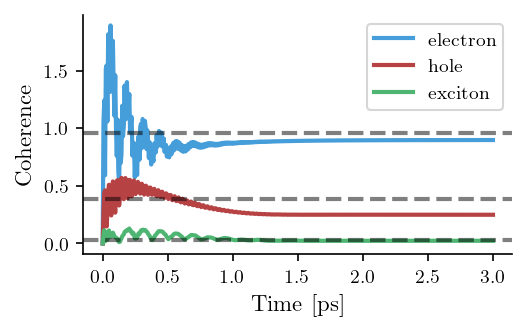

In [10]:
tb_sites = get_tb_sites('GC')
vis = Visualization(tb_sites, description='2P', loc_therm=True, tb_model_name='ELM')

fig, ax = my_plot_coh(vis)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Global Thermalizing

Number of local dephasing operators: 12
--------------------------------
Equilibium Population Electron: 0.5
Equilibium Population Hole: 0.5
Equilibium Population Exciton: 0.25


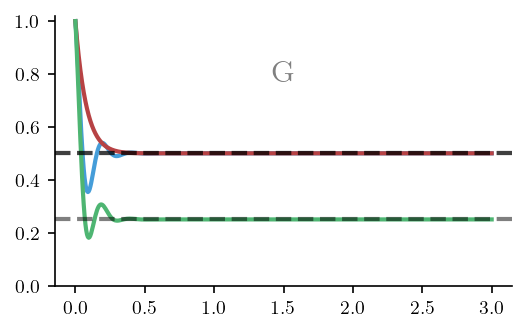

In [11]:
tb_sites = get_tb_sites('GC', tb_model_name='WM')
tb_site = '(0, 0)'
vis = Visualization(tb_sites, description='2P', glob_therm=True, tb_model_name='WM')

fig, ax = my_plot_pop(vis, tb_site)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

Number of local dephasing operators: 240
--------------------------------
Equilibium Coherence Electron: 0.963
Equilibium Coherence Hole: 0.384
Equilibium Coherence Exciton: 0.027


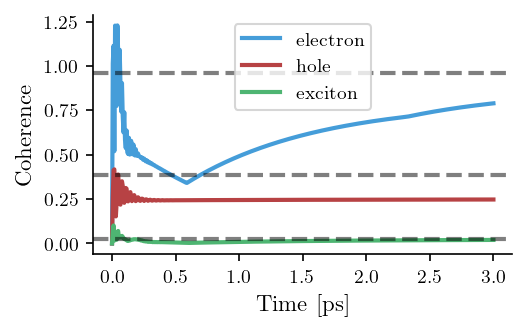

In [12]:
tb_sites = get_tb_sites('GC')
vis = Visualization(tb_sites, description='2P', glob_therm=True, tb_model_name='ELM')

fig, ax = my_plot_coh(vis)

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))

## Trace Distance to the Equilibium

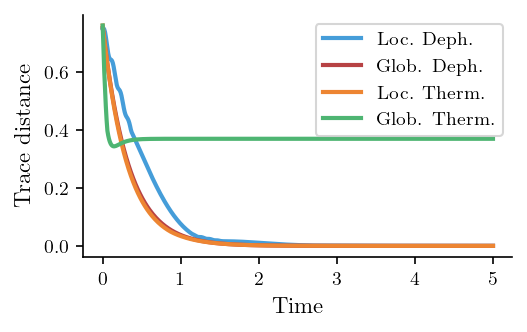

In [13]:
tb_sites = get_tb_sites('GC', tb_model_name='WM')

kwargs_loc_deph = dict(tb_model_name='WM', loc_deph_rate=3, relaxation=False, t_end=5)
kwargs_glob_deph = dict(tb_model_name='WM', glob_deph_rate=3, relaxation=False, t_end=5)
kwargs_loc_therm = dict(tb_model_name='WM', loc_therm=True, relaxation=False, t_end=5)
kwargs_glob_therm = dict(tb_model_name='WM', glob_therm=True, relaxation=False, t_end=5)

kwargs_list = [kwargs_loc_deph, kwargs_glob_deph, kwargs_loc_therm, kwargs_glob_therm]

trace_distance_list = []
for kwargs in kwargs_list:
    vis = Visualization(tb_sites, **kwargs)

    if vis.loc_deph_rate or vis.glob_deph_rate:
        eq_state = get_deph_eq_state(vis)
    if vis.loc_therm or vis.glob_therm:
        eq_state = get_therm_eq_state(vis)
        
    dms = vis.get_result()
    trace_distance = [ calc_trace_distance(dm.full(), eq_state) for dm in dms ]
    trace_distance_list.append(trace_distance)

fig, ax = plt.subplots()
for trace_distance in trace_distance_list:
    ax.plot(vis.times, trace_distance)
    
ax.legend(['Loc. Deph.', 'Glob. Deph.', 'Loc. Therm.', 'Glob. Therm.'])
ax.set_ylabel('Trace distance')
ax.set_xlabel('Time')

if save:
    fig_filename = input("Filename for Saving: ")
    plt.savefig(os.path.join(SAVE_DIR, fig_filename + '.pdf'))